In [1]:
# Import headers
import numpy as np
import pandas as pd
from zipfile import ZipFile
from sklearn.preprocessing import Normalizer
from statsmodels.tsa import stattools # Can be installed through anaconda/pip if necessary
%matplotlib inline

In [2]:
# Take a look at rent data
rent_data = pd.read_csv('medianAskingRent_All.csv')
rent_data.head()

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3025.0,3100.0,3100.0,3200.0,3195.0,...,3800.0,3799.0,3800.0,3830.0,3800.0,3872.0,3800.0,3800.0,3895.0,3800.0
1,All Midtown,Manhattan,submarket,2895.0,2800.0,2800.0,2850.0,2900.0,2950.0,3000.0,...,3500.0,3500.0,3500.0,3515.0,3550.0,3536.0,3579.0,3500.0,3575.0,3570.0
2,All Upper East Side,Manhattan,submarket,2469.0,2450.0,2400.0,2500.0,2550.0,2550.0,2595.0,...,2900.0,2910.0,2900.0,2895.0,2995.0,2995.0,3000.0,3000.0,3000.0,2995.0
3,All Upper Manhattan,Manhattan,submarket,1825.0,1800.0,1795.0,1800.0,1823.0,1850.0,1875.0,...,2400.0,2430.0,2400.0,2350.0,2350.0,2300.0,2300.0,2300.0,2337.0,2383.0
4,All Upper West Side,Manhattan,submarket,2895.0,2800.0,2750.0,2800.0,2798.0,2795.0,2800.0,...,3350.0,3334.0,3318.0,3400.0,3399.0,3395.0,3400.0,3400.0,3375.0,3400.0


In [3]:
# Filter rent data and extract rent for required dates - Jan 2016 to Dec 2017 and Jan 2018 to Dec 2018
manhattan_rent = rent_data[rent_data.Borough == 'Manhattan'][rent_data.areaType == 'neighborhood']
exclude_rows = ['Civic Center', 'Marble Hill', 'Manhattanville', 'Roosevelt Island']
manhattan_rent_train = pd.concat([manhattan_rent.iloc[:, 0:1], manhattan_rent.iloc[:, 75:99]], axis = 1)
manhattan_rent_train = manhattan_rent_train[~manhattan_rent_train.areaName.isin(exclude_rows)]
manhattan_rent_test = pd.concat([manhattan_rent.iloc[:, 0:1], manhattan_rent.iloc[:, 99:111]], axis = 1)
manhattan_rent_test = manhattan_rent_test[~manhattan_rent_test.areaName.isin(exclude_rows)]

C:\Users\Amorian\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [4]:
# Switch areas to neighborhood names
area_change = {"Battery Park City" : "Downtown",
               "Central Harlem" : "Harlem", 
               "Central Park South" : "Midtown", 
               "Chelsea" : "Midtown", 
               "Chinatown" : "Lower East Side", 
               "East Harlem" : "Harlem", 
               "East Village" : "Lower East Side",
               "Financial District" : "Downtown",
               "Flatiron" : "Midtown",
               "Gramercy Park" : "Midtown",
               "Greenwich Village" : "Downtown",
               "Hamilton Heights" : "Upper Manhattan",
               "Inwood" : "Upper Manhattan",
               "Little Italy" : "Downtown",
               "Lower East Side" : "Lower East Side",
               "Midtown" : "Midtown",
               "Midtown East" : "Midtown",
               "Midtown South" : "Midtown",
               "Midtown West" : "Midtown",
               "Morningside Heights" : "Harlem",
               "Nolita" : "Downtown",
               "Soho" : "Downtown",
               "Stuyvesant Town/PCV" : "Lower East Side",
               "Tribeca" : "Downtown",
               "Upper East Side" : "Upper East Side",
               "Upper West Side" : "Upper West Side",
               "Washington Heights" : "Upper Manhattan",
               "West Harlem" : "Harlem",
               "West Village" : "Downtown" 
              }

In [5]:
# Average rent prices in each neighborhood
manhattan_rent_train = manhattan_rent_train.replace(area_change).groupby('areaName').mean()
manhattan_rent_test = manhattan_rent_test.replace(area_change).groupby('areaName').mean()
manhattan_rent_train = manhattan_rent_train.T
manhattan_rent_test = manhattan_rent_test.T

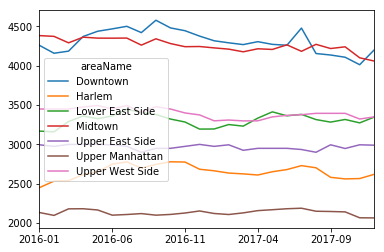

In [6]:
manhattan_rent_train.plot()

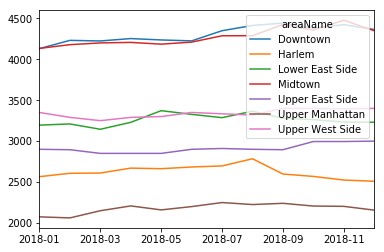

In [7]:
manhattan_rent_test.plot()

In [8]:
# Load Rodent data and extract dates and zipcode
rodent_data = pd.read_csv('Rodent_Inspection.csv', parse_dates = ['APPROVED_DATE'])
rodent_data = rodent_data[rodent_data.BORO_CODE == 1]
rodent_data['APPROVED_DATE'] = rodent_data['APPROVED_DATE'].dt.to_period('M')
rodent_train = rodent_data[(rodent_data['APPROVED_DATE'] >= '2016-01') &
         (rodent_data['APPROVED_DATE'] <= '2017-12')]
rodent_train = rodent_train[['ZIP_CODE','APPROVED_DATE']]
rodent_train = rodent_train.dropna(axis = 0, how = 'any')
rodent_train['ZIP_CODE'] = rodent_train['ZIP_CODE'].astype(int)
rodent_test = rodent_data[(rodent_data['APPROVED_DATE'] >= '2018-01') &
         (rodent_data['APPROVED_DATE'] <= '2018-12')]
rodent_test = rodent_test[['ZIP_CODE','APPROVED_DATE']]
rodent_test = rodent_test.dropna(axis = 0, how = 'any')
rodent_test['ZIP_CODE'] = rodent_test['ZIP_CODE'].astype(int)

In [9]:
# Change zipcodes to neighborhood
zipcode_change = {
    10026 : "Harlem",
    10027 : "Harlem",
    10030 : "Harlem",
    10037 : "Harlem",
    10039 : "Harlem",
    10029 : "Harlem",
    10035 : "Harlem",
    10001 : "Midtown",
    10011 : "Midtown",
    10018 : "Midtown",
    10019 : "Midtown",
    10020 : "Midtown",
    10036 : "Midtown",
    10010 : "Midtown",
    10016 : "Midtown",
    10017 : "Midtown",
    10022 : "Midtown",
    10004 : "Downtown",
    10005 : "Downtown",
    10006 : "Downtown",
    10007 : "Downtown",
    10038 : "Downtown",
    10280 : "Downtown",
    10012 : "Downtown",
    10013 : "Downtown",
    10014 : "Downtown",
    10002 : "Lower East Side",
    10003 : "Lower East Side",
    10009 : "Lower East Side",
    10021 : "Upper East Side",
    10028 : "Upper East Side",
    10044 : "Upper East Side",
    10065 : "Upper East Side",
    10075 : "Upper East Side",
    10128 : "Upper East Side",
    10023 : "Upper West Side",
    10024 : "Upper West Side",
    10025 : "Upper West Side",
    10031 : "Upper Manhattan",
    10032 : "Upper Manhattan",
    10033 : "Upper Manhattan",
    10034 : "Upper Manhattan",
    10040 : "Upper Manhattan"
}
exclude_zip = [0, 10000, 10041, 10048, 10055, 10080, 10069]
exclude_zip.extend(range(0, 10000))
exclude_zip.extend(range(10100, 100000))

In [10]:
# Crosstabs for the count
rodent_train = rodent_train[~rodent_train['ZIP_CODE'].isin(exclude_zip)]
rodent_test = rodent_test[~rodent_test['ZIP_CODE'].isin(exclude_zip)]
rodent_train = rodent_train.replace(zipcode_change)
rodent_test = rodent_test.replace(zipcode_change)
rodent_train = pd.crosstab(rodent_train['ZIP_CODE'], rodent_train['APPROVED_DATE'])
rodent_test = pd.crosstab(rodent_test['ZIP_CODE'], rodent_test['APPROVED_DATE'])
rodent_train = rodent_train.T
rodent_test = rodent_test.T

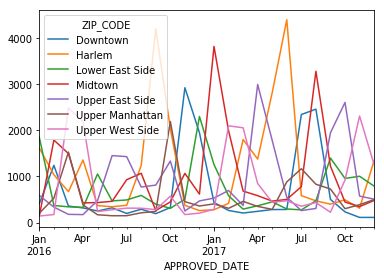

In [11]:
rodent_train.plot()

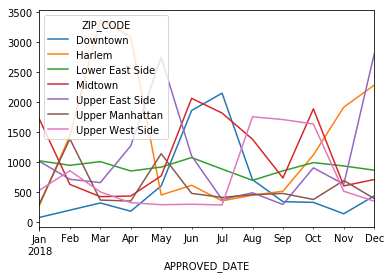

In [12]:
rodent_test.plot()

In [13]:
# Load linknyc data and extract dates and zipcodes
linknyc_data = pd.read_csv('LinkNYC_Locations.csv', parse_dates = ['Link Smoke Tested and Activated (A)'])
linknyc_data = linknyc_data[linknyc_data.Borough == 'Manhattan'][linknyc_data['Project Status'] == 'Live']
linknyc_data.rename(columns={'Link Smoke Tested and Activated (A)': 'LinkDate'}, inplace=True)
linknyc_data['LinkDate'] = linknyc_data['LinkDate'].dt.to_period('M')
linknyc_train = linknyc_data[(linknyc_data['LinkDate'] >= '2016-01') &
         (linknyc_data['LinkDate'] <= '2017-12')]
linknyc_train = linknyc_train[['Postcode','LinkDate']]
linknyc_train = linknyc_train.dropna(axis = 0, how = 'any')
linknyc_train['Postcode'] = linknyc_train['Postcode'].astype(int)
linknyc_test = linknyc_data[(linknyc_data['LinkDate'] >= '2018-01') &
         (linknyc_data['LinkDate'] <= '2018-12')]
linknyc_test = linknyc_test[['Postcode','LinkDate']]
linknyc_test = linknyc_test.dropna(axis = 0, how = 'any')
linknyc_test['Postcode'] = linknyc_test['Postcode'].astype(int)

C:\Users\Amorian\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# Crosstabs for the count
linknyc_train = linknyc_train[~linknyc_train['Postcode'].isin(exclude_zip)]
linknyc_test = linknyc_test[~linknyc_test['Postcode'].isin(exclude_zip)]
linknyc_train = linknyc_train.replace(zipcode_change)
linknyc_test = linknyc_test.replace(zipcode_change)
linknyc_train = pd.crosstab(linknyc_train['Postcode'], linknyc_train['LinkDate'])
linknyc_test = pd.crosstab(linknyc_test['Postcode'], linknyc_test['LinkDate'])
linknyc_train = linknyc_train.T
linknyc_test = linknyc_test.T

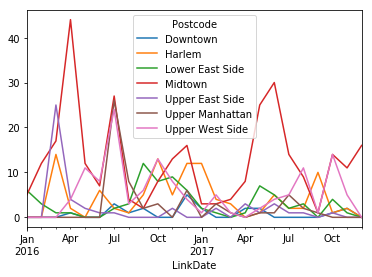

In [15]:
linknyc_train.plot()

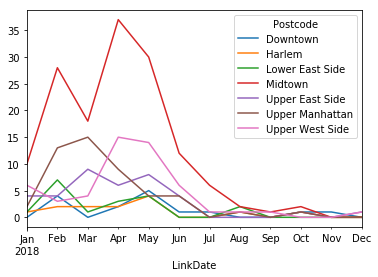

In [16]:
linknyc_test.plot()

In [17]:
# Load restaurant inspection data and extract dates and zipcodes
inspection_data = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv', parse_dates = ['INSPECTION DATE'])
inspection_data = inspection_data[inspection_data.BORO == 'MANHATTAN'][inspection_data['CRITICAL FLAG'].isin(['Critical', 'Not Critical'])]
inspection_data['INSPECTION DATE'] = inspection_data['INSPECTION DATE'].dt.to_period('M')
inspection_train = inspection_data[(inspection_data['INSPECTION DATE'] >= '2016-01') &
         (inspection_data['INSPECTION DATE'] <= '2017-12')]
inspection_train = inspection_train[['ZIPCODE','INSPECTION DATE']]
inspection_train = inspection_train.dropna(axis = 0, how = 'any')
inspection_train['ZIPCODE'] = inspection_train['ZIPCODE'].astype(int)
inspection_test = inspection_data[(inspection_data['INSPECTION DATE'] >= '2018-01') &
         (inspection_data['INSPECTION DATE'] <= '2018-12')]
inspection_test = inspection_test[['ZIPCODE','INSPECTION DATE']]
inspection_test = inspection_test.dropna(axis = 0, how = 'any')
inspection_test['ZIPCODE'] = inspection_test['ZIPCODE'].astype(int)

C:\Users\Amorian\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Amorian\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
# Crosstabs for the count
inspection_train = inspection_train[~inspection_train['ZIPCODE'].isin(exclude_zip)]
inspection_test = inspection_test[~inspection_test['ZIPCODE'].isin(exclude_zip)]
inspection_train = inspection_train.replace(zipcode_change)
inspection_test = inspection_test.replace(zipcode_change)
inspection_train = pd.crosstab(inspection_train['ZIPCODE'], inspection_train['INSPECTION DATE'])
inspection_test = pd.crosstab(inspection_test['ZIPCODE'], inspection_test['INSPECTION DATE'])
inspection_train = inspection_train.T
inspection_test = inspection_test.T

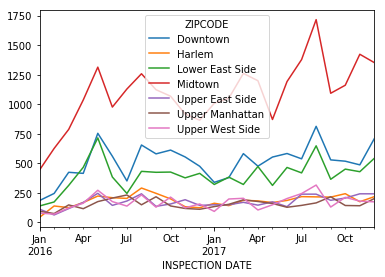

In [19]:
inspection_train.plot()

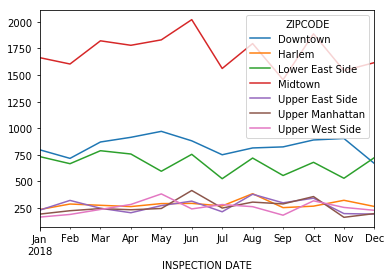

In [20]:
inspection_test.plot()

In [21]:
# DO NOT RUN THIS
# 10.9GB file, made a smaller version with date and zip for easier access
# Export full csv if needed from here and then run this - https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9
# service_data = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', usecols = ['Created Date', 'Incident Zip'], parse_dates = ['Created Date'])
# service_data.to_csv('ServiceRequests311Short.csv', index = False)
# service_data.head()

In [22]:
# Read shortened file and parse dates
service_data = pd.read_csv('ServiceRequests311Short.csv', parse_dates = ['Created Date'])
service_data['Created Date'] = service_data['Created Date'].dt.to_period('M')
service_train = service_data[(service_data['Created Date'] >= '2016-01') &
         (service_data['Created Date'] <= '2017-12')]
service_train = service_train[['Incident Zip','Created Date']]
service_train = service_train.dropna(axis = 0, how = 'any')
service_test = service_data[(service_data['Created Date'] >= '2018-01') &
         (service_data['Created Date'] <= '2018-12')]
service_test = service_test[['Incident Zip','Created Date']]
service_test = service_test.dropna(axis = 0, how = 'any')

C:\Users\Amorian\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
# Crosstabs for count
# NOTE - Test data barely has any entries for Manhattan from May 2018
service_train = service_train[service_train['Incident Zip'].isin(list(zipcode_change.keys()))]
service_test = service_test[service_test['Incident Zip'].isin(list(zipcode_change.keys()))]
service_train = service_train.replace(zipcode_change)
service_test = service_test.replace(zipcode_change)
service_train = pd.crosstab(service_train['Incident Zip'], service_train['Created Date'])
service_test = pd.crosstab(service_test['Incident Zip'], service_test['Created Date'])
service_train = service_train.T
service_test = service_test.T

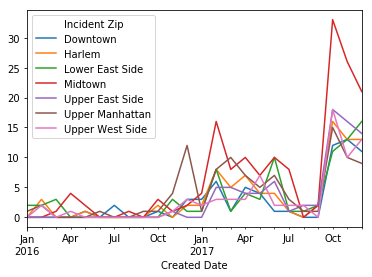

In [24]:
service_train.plot()

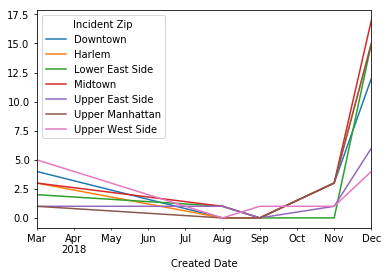

In [25]:
service_test.plot()

In [26]:
# Load Legally Operating Businesses data by license date and zipcode
business_data = pd.read_csv('Legally_Operating_Businesses.csv', parse_dates = ['License Creation Date'])
business_data = business_data[business_data['Borough Code'] == 1]
business_data.rename(columns={'License Creation Date': 'LicenseDate'}, inplace=True)
business_data['LicenseDate'] = business_data['LicenseDate'].dt.to_period('M')
business_train = business_data[(business_data['LicenseDate'] >= '2016-01') &
         (business_data['LicenseDate'] <= '2017-12')]
business_train = business_train[['Address ZIP','LicenseDate']]
business_train = business_train.dropna(axis = 0, how = 'any')
business_train['Address ZIP'] = business_train['Address ZIP'].astype(int)
business_test = business_data[(business_data['LicenseDate'] >= '2018-01') &
         (business_data['LicenseDate'] <= '2018-12')]
business_test = business_test[['Address ZIP','LicenseDate']]
business_test = business_test.dropna(axis = 0, how = 'any')
business_test['Address ZIP'] = business_test['Address ZIP'].astype(int)

C:\Users\Amorian\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
# Crosstabs for count
business_train = business_train[~business_train['Address ZIP'].isin(exclude_zip)]
business_test = business_test[~business_test['Address ZIP'].isin(exclude_zip)]
business_train = business_train.replace(zipcode_change)
business_test = business_test.replace(zipcode_change)
business_train = pd.crosstab(business_train['Address ZIP'], business_train['LicenseDate'])
business_test = pd.crosstab(business_test['Address ZIP'], business_test['LicenseDate'])
business_train = business_train.T
business_test = business_test.T

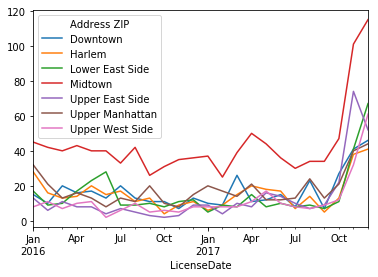

In [28]:
business_train.plot()

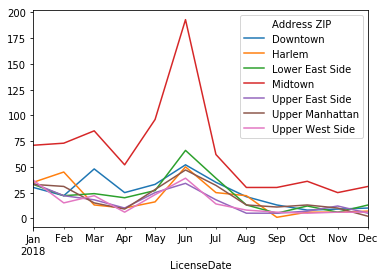

In [29]:
business_test.plot()

In [30]:
# Putting all datasets together based on neighborhood
axis = ['Date', 'Rats', 'LinkNYC', 'RestaurantInspections', 'Business', 'Rent']
train_dates = pd.Series(manhattan_rent_train.index.values)
test_dates = pd.Series(manhattan_rent_test.index.values)

downtown_train = pd.concat([train_dates, pd.Series(rodent_train.iloc[:, 0].values), pd.Series(linknyc_train.iloc[:, 0].values), pd.Series(inspection_train.iloc[:, 0].values), pd.Series(business_train.iloc[:, 0].values), pd.Series(manhattan_rent_train.iloc[:, 0].values)], axis = 1)
downtown_train.set_axis(axis, axis = 1, inplace = True)
downtown_train.set_index('Date', inplace = True)
downtown_test = pd.concat([test_dates, pd.Series(rodent_test.iloc[:, 0].values), pd.Series(linknyc_test.iloc[:, 0].values), pd.Series(inspection_test.iloc[:, 0].values), pd.Series(business_test.iloc[:, 0].values), pd.Series(manhattan_rent_test.iloc[:, 0].values)], axis = 1)
downtown_test.set_axis(axis, axis = 1, inplace = True)
downtown_test.set_index('Date', inplace = True)

harlem_train = pd.concat([train_dates, pd.Series(rodent_train.iloc[:, 1].values), pd.Series(linknyc_train.iloc[:, 1].values), pd.Series(inspection_train.iloc[:, 1].values), pd.Series(business_train.iloc[:, 1].values), pd.Series(manhattan_rent_train.iloc[:, 1].values)], axis = 1)
harlem_train.set_axis(axis, axis = 1, inplace = True)
harlem_train.set_index('Date', inplace = True)
harlem_test = pd.concat([test_dates, pd.Series(rodent_test.iloc[:, 1].values), pd.Series(linknyc_test.iloc[:, 1].values), pd.Series(inspection_test.iloc[:, 1].values), pd.Series(business_test.iloc[:, 1].values), pd.Series(manhattan_rent_test.iloc[:, 1].values)], axis = 1)
harlem_test.set_axis(axis, axis = 1, inplace = True)
harlem_test.set_index('Date', inplace = True)

les_train = pd.concat([train_dates, pd.Series(rodent_train.iloc[:, 2].values), pd.Series(linknyc_train.iloc[:, 2].values), pd.Series(inspection_train.iloc[:, 2].values), pd.Series(business_train.iloc[:, 2].values), pd.Series(manhattan_rent_train.iloc[:, 2].values)], axis = 1)
les_train.set_axis(axis, axis = 1, inplace = True)
les_train.set_index('Date', inplace = True)
les_test = pd.concat([test_dates, pd.Series(rodent_test.iloc[:, 2].values), pd.Series(linknyc_test.iloc[:, 2].values), pd.Series(inspection_test.iloc[:, 2].values), pd.Series(business_test.iloc[:, 2].values), pd.Series(manhattan_rent_test.iloc[:, 2].values)], axis = 1)
les_test.set_axis(axis, axis = 1, inplace = True)
les_test.set_index('Date', inplace = True)

midtown_train = pd.concat([train_dates, pd.Series(rodent_train.iloc[:, 3].values), pd.Series(linknyc_train.iloc[:, 3].values), pd.Series(inspection_train.iloc[:, 3].values), pd.Series(business_train.iloc[:, 3].values), pd.Series(manhattan_rent_train.iloc[:, 3].values)], axis = 1)
midtown_train.set_axis(axis, axis = 1, inplace = True)
midtown_train.set_index('Date', inplace = True)
midtown_test = pd.concat([test_dates, pd.Series(rodent_test.iloc[:, 3].values), pd.Series(linknyc_test.iloc[:, 3].values), pd.Series(inspection_test.iloc[:, 3].values), pd.Series(business_test.iloc[:, 3].values), pd.Series(manhattan_rent_test.iloc[:, 3].values)], axis = 1)
midtown_test.set_axis(axis, axis = 1, inplace = True)
midtown_test.set_index('Date', inplace = True)

ues_train = pd.concat([train_dates, pd.Series(rodent_train.iloc[:, 4].values), pd.Series(linknyc_train.iloc[:, 4].values), pd.Series(inspection_train.iloc[:, 4].values), pd.Series(business_train.iloc[:, 4].values), pd.Series(manhattan_rent_train.iloc[:, 4].values)], axis = 1)
ues_train.set_axis(axis, axis = 1, inplace = True)
ues_train.set_index('Date', inplace = True)
ues_test = pd.concat([test_dates, pd.Series(rodent_test.iloc[:, 4].values), pd.Series(linknyc_test.iloc[:, 4].values), pd.Series(inspection_test.iloc[:, 4].values), pd.Series(business_test.iloc[:, 4].values), pd.Series(manhattan_rent_test.iloc[:, 4].values)], axis = 1)
ues_test.set_axis(axis, axis = 1, inplace = True)
ues_test.set_index('Date', inplace = True)

um_train = pd.concat([train_dates, pd.Series(rodent_train.iloc[:, 5].values), pd.Series(linknyc_train.iloc[:, 5].values), pd.Series(inspection_train.iloc[:, 5].values), pd.Series(business_train.iloc[:, 5].values), pd.Series(manhattan_rent_train.iloc[:, 5].values)], axis = 1)
um_train.set_axis(axis, axis = 1, inplace = True)
um_train.set_index('Date', inplace = True)
um_test = pd.concat([test_dates, pd.Series(rodent_test.iloc[:, 5].values), pd.Series(linknyc_test.iloc[:, 5].values), pd.Series(inspection_test.iloc[:, 5].values), pd.Series(business_test.iloc[:, 5].values), pd.Series(manhattan_rent_test.iloc[:, 5].values)], axis = 1)
um_test.set_axis(axis, axis = 1, inplace = True)
um_test.set_index('Date', inplace = True)

uws_train = pd.concat([train_dates, pd.Series(rodent_train.iloc[:, 6].values), pd.Series(linknyc_train.iloc[:, 6].values), pd.Series(inspection_train.iloc[:, 6].values), pd.Series(business_train.iloc[:, 6].values), pd.Series(manhattan_rent_train.iloc[:, 6].values)], axis = 1)
uws_train.set_axis(axis, axis = 1, inplace = True)
uws_train.set_index('Date', inplace = True)
uws_test = pd.concat([test_dates, pd.Series(rodent_test.iloc[:, 6].values), pd.Series(linknyc_test.iloc[:, 6].values), pd.Series(inspection_test.iloc[:, 6].values), pd.Series(business_test.iloc[:, 6].values), pd.Series(manhattan_rent_test.iloc[:, 6].values)], axis = 1)
uws_test.set_axis(axis, axis = 1, inplace = True)
uws_test.set_index('Date', inplace = True)

downtown_train_norm = downtown_train.copy()
downtown_test_norm = downtown_test.copy()
harlem_train_norm = harlem_train.copy()
harlem_test_norm = harlem_test.copy()
les_train_norm = les_train.copy()
les_test_norm = les_test.copy()
midtown_train_norm = midtown_train.copy()
midtown_test_norm = midtown_test.copy()
ues_train_norm = ues_train.copy()
ues_test_norm = ues_test.copy()
um_train_norm = um_train.copy()
um_test_norm = um_test.copy()
uws_train_norm = uws_train.copy()
uws_test_norm = uws_test.copy()


downtown_train_norm.iloc[:,:] = Normalizer(norm='l1').fit_transform(downtown_train)
harlem_train_norm.iloc[:,:] = Normalizer(norm='l1').fit_transform(harlem_train)
les_train_norm.iloc[:,:] = Normalizer(norm='l1').fit_transform(les_train)
midtown_train_norm.iloc[:,:] = Normalizer(norm='l1').fit_transform(midtown_train)
ues_train_norm.iloc[:,:] = Normalizer(norm='l1').fit_transform(ues_train)
um_train_norm.iloc[:,:] = Normalizer(norm='l1').fit_transform(um_train)
uws_train_norm.iloc[:,:] = Normalizer(norm='l1').fit_transform(uws_train)

downtown_test_norm.iloc[:,:] = Normalizer(norm='l1').fit_transform(downtown_test)
harlem_test_norm.iloc[:,:] = Normalizer(norm='l1').fit_transform(harlem_test)
les_test_norm.iloc[:,:] = Normalizer(norm='l1').fit_transform(les_test)
midtown_test_norm.iloc[:,:] = Normalizer(norm='l1').fit_transform(midtown_test)
ues_test_norm.iloc[:,:] = Normalizer(norm='l1').fit_transform(ues_test)
um_test_norm.iloc[:,:] = Normalizer(norm='l1').fit_transform(um_test)
uws_test_norm.iloc[:,:] = Normalizer(norm='l1').fit_transform(uws_test)

downtown_train_norm.to_csv('data/downtown_train.csv')
downtown_test_norm.to_csv('data/downtown_test.csv')
harlem_train_norm.to_csv('data/harlem_train.csv')
harlem_test_norm.to_csv('data/harlem_test.csv')
les_train_norm.to_csv('data/les_train.csv')
les_test_norm.to_csv('data/les_test.csv')
midtown_train_norm.to_csv('data/midtown_train.csv')
midtown_test_norm.to_csv('data/midtown_test.csv')
ues_train_norm.to_csv('data/ues_train.csv')
ues_test_norm.to_csv('data/ues_test.csv')
um_train_norm.to_csv('data/um_train.csv')
um_test_norm.to_csv('data/um_test.csv')
uws_train_norm.to_csv('data/uws_train.csv')
uws_test_norm.to_csv('data/uws_test.csv')

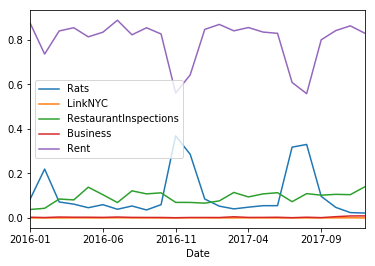

In [31]:
downtown_train_norm.plot()

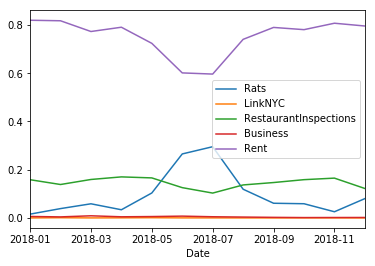

In [32]:
downtown_test_norm.plot()

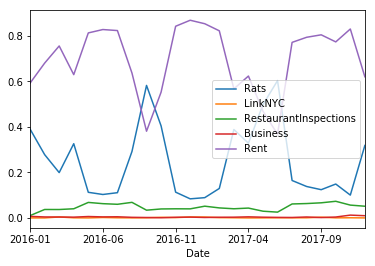

In [33]:
harlem_train_norm.plot()

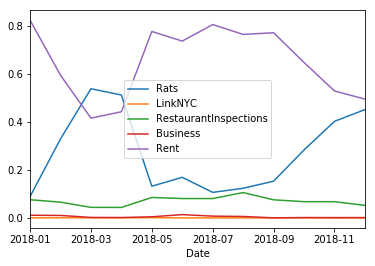

In [34]:
harlem_test_norm.plot()

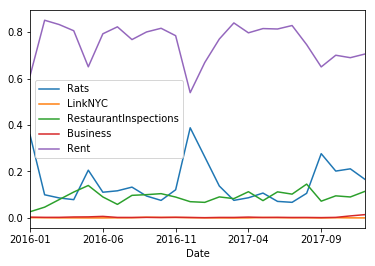

In [35]:
les_train_norm.plot()

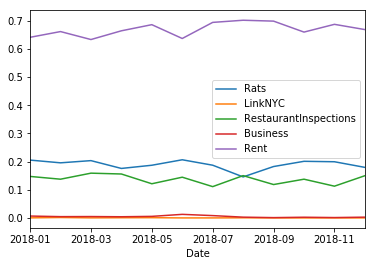

In [36]:
les_test_norm.plot()

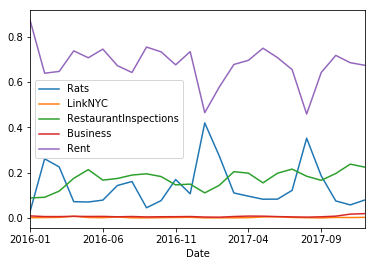

In [37]:
midtown_train_norm.plot()

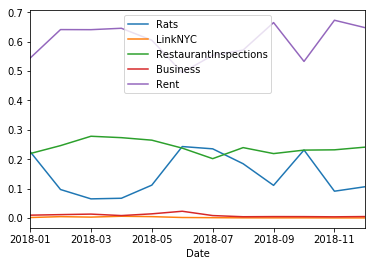

In [38]:
midtown_test_norm.plot()

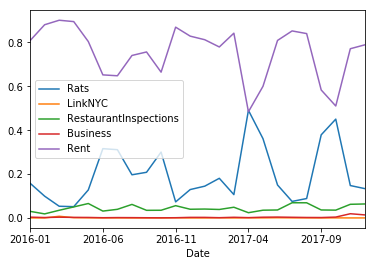

In [39]:
ues_train_norm.plot()

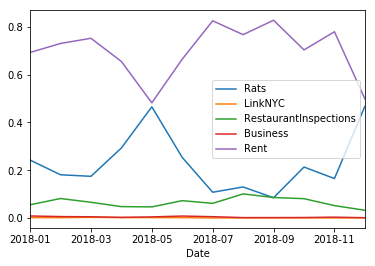

In [40]:
ues_test_norm.plot()

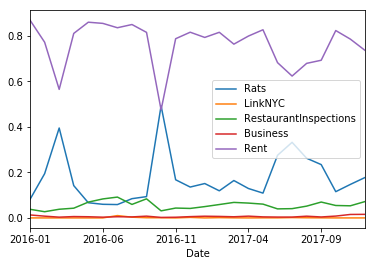

In [41]:
um_train_norm.plot()

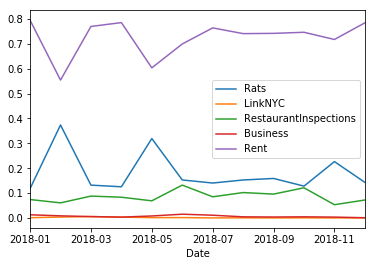

In [42]:
um_test_norm.plot()

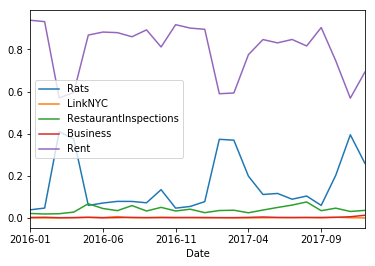

In [43]:
uws_train_norm.plot()

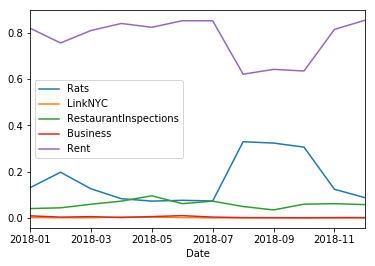

In [44]:
uws_test_norm.plot()

In [45]:
# Granger Causality Tests
granger_data = pd.read_csv("data/downtown_train.csv") # Replace with any file in data for granger tests
granger_array = downtown_train[['Rats', 'Rent']].values
stattools.grangercausalitytests(granger_array, 5, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.0769  , p=0.1650  , df_denom=20, df_num=1
ssr based chi2 test:   chi2=2.3885  , p=0.1222  , df=1
likelihood ratio test: chi2=2.2724  , p=0.1317  , df=1
parameter F test:         F=2.0769  , p=0.1650  , df_denom=20, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4593  , p=0.6393  , df_denom=17, df_num=2
ssr based chi2 test:   chi2=1.1889  , p=0.5519  , df=2
likelihood ratio test: chi2=1.1579  , p=0.5605  , df=2
parameter F test:         F=0.4593  , p=0.6393  , df_denom=17, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1722  , p=0.9134  , df_denom=14, df_num=3
ssr based chi2 test:   chi2=0.7751  , p=0.8554  , df=3
likelihood ratio test: chi2=0.7611  , p=0.8587  , df=3
parameter F test:         F=0.1722  , p=0.9134  , df_denom=14, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1864  , p=0.9406  , df_d

{1: ({'ssr_ftest': (2.076915348390402, 0.16501653343426764, 20.0, 1),
   'ssr_chi2test': (2.3884526506489623, 0.12223456476803551, 1),
   'lrtest': (2.2724053974358753, 0.13169535976260444, 1),
   'params_ftest': (2.0769153483912066, 0.16501653343418943, 20.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.45933494441696143, 0.6393178028732972, 17.0, 2),
   'ssr_chi2test': (1.1888669149615474, 0.5518751380477621, 2),
   'lrtest': (1.157856387210586, 0.5604987909269288, 2),
   'params_ftest': (0.4593349444169673, 0.6393178028732934, 17.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.1722373371108223, 0.9133764651623519, 14.0, 3),
   'ssr_chi2test': (0.7750680169987003, 0.8554206634523146, 3),
   'lrtest': (0.7611073814026099, 0.858745188647235, 3),
   'params_ftest': (0.1722373371108129, 0.9133764651623583, 14.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 